In [9]:
from top2vec import Top2Vec
from helpers import read_jsonl, meta_path, texts_path, Publication, ROOT

In [4]:
def retrieve_texts(data: Publication, field: str = "body_text") -> str:
    """Parse 'body_text' or 'abstract' fields extracting raw texts."""
    return " ".join(section["text"] for section in data[field])

In [5]:
texts = [retrieve_texts(paper) for paper in read_jsonl(texts_path)]

In [6]:
sample = texts[4_500:6_000]
len(sample)

1500

In [7]:
model = Top2Vec(
    documents=sample,
    speed="fast-learn",
    min_count=50,
)

2021-08-08 19:07:14,866 - top2vec - INFO - Pre-processing documents for training
2021-08-08 19:08:03,059 - top2vec - INFO - Creating joint document/word embedding
2021-08-08 20:10:35,029 - top2vec - INFO - Creating lower dimension embedding of documents
2021-08-08 20:10:58,469 - top2vec - INFO - Finding dense areas of documents
2021-08-08 20:10:58,612 - top2vec - INFO - Finding topics


In [10]:
model.save(ROOT / "models" / "210804-S2ORC.model")

---

In [11]:
model = Top2Vec.load(ROOT / "models" / "210804-S2ORC.model")

In [12]:
model.get_num_topics()

9

In [13]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [14]:
topic_words, word_scores, topic_nums = model.get_topics(5)

In [15]:
topic_words[0]

array(['cold', 'russia', 'nato', 'military', 'allies', 'war', 'soviet',
       'europe', 'east', 'russian', 'security', 'peace', 'nuclear',
       'union', 'anzus', 'asia', 'states', 'iraq', 'eastern', 'forces',
       'militarily', 'moscow', 'truman', 'afghanistan', 'exports',
       'alliance', 'superpower', 'defense', 'dulles', 'republics',
       'region', 'pentagon', 'stability', 'regional', 'putin',
       'president', 'wars', 'ussr', 'united', 'geopolitical', 'crisis',
       'enlargement', 'monadic', 'eurasian', 'communist', 'powers',
       'economic', 'communism', 'troops', 'strategic'], dtype='<U14')

In [21]:
topic_words[1]

array(['universities', 'education', 'higher', 'academic', 'students',
       'university', 'teaching', 'campuses', 'curriculum', 'quality',
       'student', 'emi', 'faculty', 'educational', 'courses', 'graduates',
       'assurance', 'learning', 'tuition', 'programs', 'accreditation',
       'mobility', 'enrollment', 'colleges', 'esg', 'curricular', 'heis',
       'undergraduate', 'doctoral', 'bologna', 'tertiary', 'graduate',
       'curricula', 'excellence', 'training', 'professional', 'skills',
       'institution', 'staff', 'talent', 'research', 'hei', 'bachelor',
       'campus', 'qualifications', 'institutions', 'knight',
       'postgraduate', 'teachers', 'vocational'], dtype='<U14')

In [22]:
topic_words[2]

array(['climate', 'health', 'sustainable', 'biodiversity', 'food',
       'poverty', 'fao', 'water', 'deforestation', 'crops', 'agriculture',
       'ghg', 'environmental', 'agricultural', 'droughts', 'impacts',
       'sanitation', 'ngos', 'crop', 'unfccc', 'emissions', 'development',
       'developing', 'ipcc', 'mitigation', 'projects', 'donors',
       'greenhouse', 'dfid', 'donor', 'drought', 'pesticides', 'global',
       'carbon', 'communicable', 'diseases', 'biotechnology', 'bccsap',
       'reduction', 'farmers', 'disease', 'gmo', 'maize', 'cartagena',
       'mdgs', 'livelihoods', 'hiv', 'sector', 'oxfam', 'dac'],
      dtype='<U14')

In [23]:
topic_words[3]

array(['courts', 'court', 'jurisdiction', 'law', 'judicial', 'provisions',
       'treaties', 'convention', 'treaty', 'proceedings', 'lis',
       'constitutional', 'tfeu', 'pendens', 'tribunal', 'supreme',
       'constitution', 'procedural', 'pursuant', 'cfsp', 'article',
       'clause', 'teu', 'jurisprudence', 'cjeu', 'jurisdictional',
       'amendments', 'arbitration', 'legal', 'amendment', 'legislation',
       'echr', 'ecthr', 'daimler', 'statute', 'cisg', 'procedure', 'wto',
       'criminal', 'judges', 'plaintiff', 'rights', 'obligations', 'acts',
       'judgment', 'rux', 'obligation', 'pending', 'hague', 'tribunals'],
      dtype='<U14')

In [24]:
topic_words[4]

array(['god', 'hegel', 'man', 'divine', 'religion', 'beings', 'ontology',
       'religious', 'kraynak', 'christianity', 'life', 'modernity',
       'theological', 'ontological', 'enlightenment', 'theology',
       'philosophical', 'spiritual', 'epistemology', 'christ', 'humans',
       'church', 'christian', 'philosophers', 'humanity', 'primitive',
       'secular', 'capitalism', 'sense', 'ourselves', 'centuries',
       'capitalist', 'locke', 'moral', 'tradition', 'eternal',
       'subjectivity', 'islam', 'dialectic', 'soul', 'calvin', 'foucault',
       'modern', 'freedom', 'reality', 'societies', 'live', 'universe',
       'christians', 'truth'], dtype='<U14')

In [26]:
words, word_scores = model.similar_words(
    keywords=["russia"], 
    keywords_neg=[], 
    num_words=20
)

In [27]:
words

array(['russian', 'moscow', 'ukraine', 'putin', 'eurasian', 'soviet',
       'union', 'belarus', 'eastern', 'east', 'moldova', 'azerbaijan',
       'republics', 'west', 'europe', 'germany', 'crimea', 'ussr', 'cis',
       'geopolitical'], dtype='<U12')

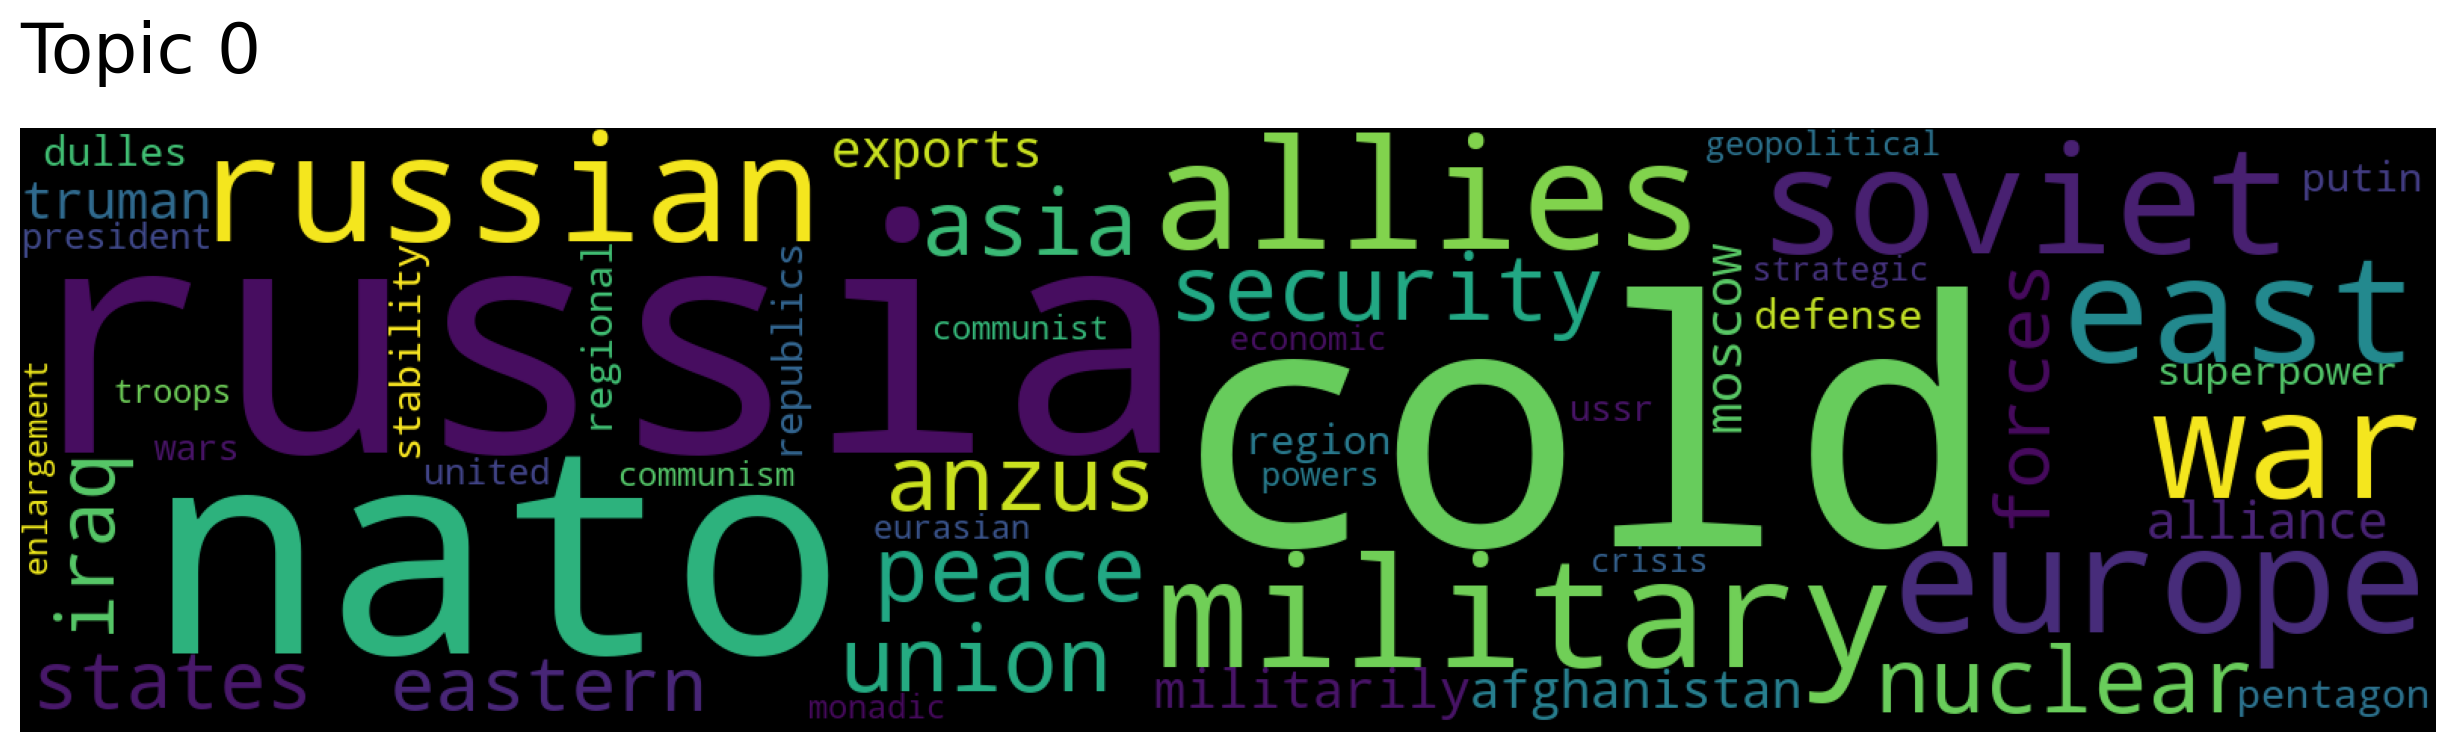

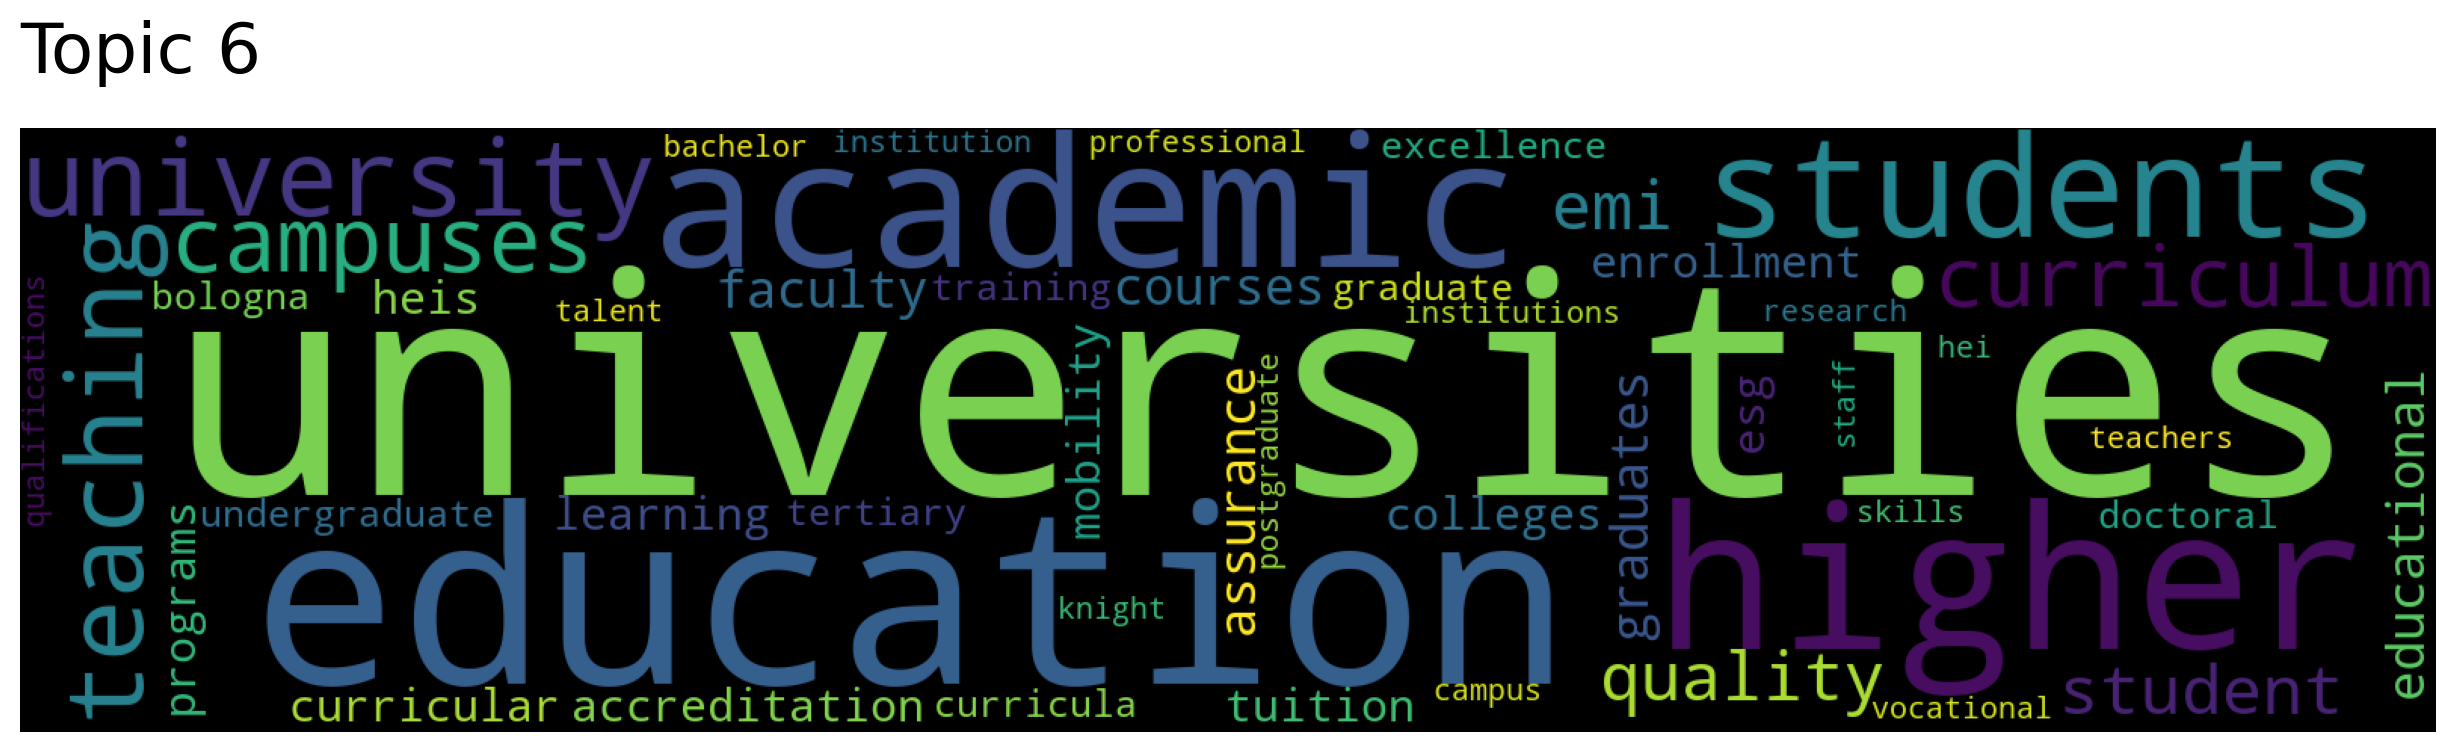

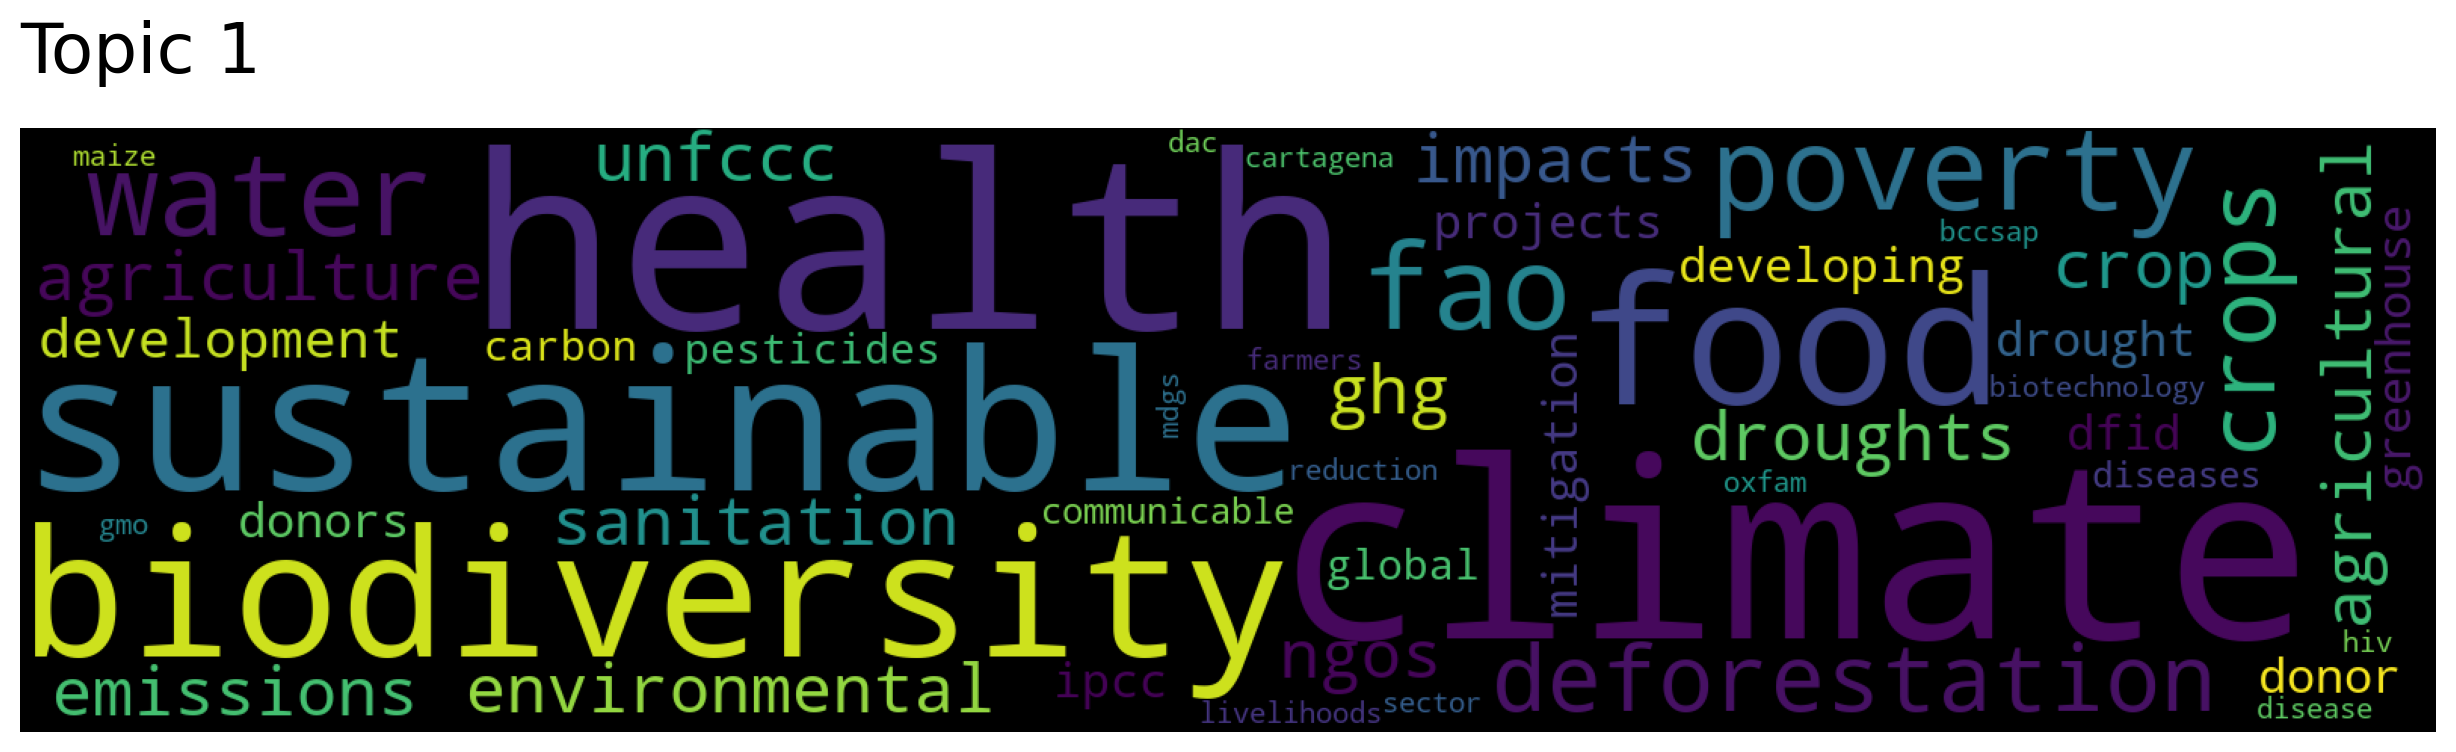

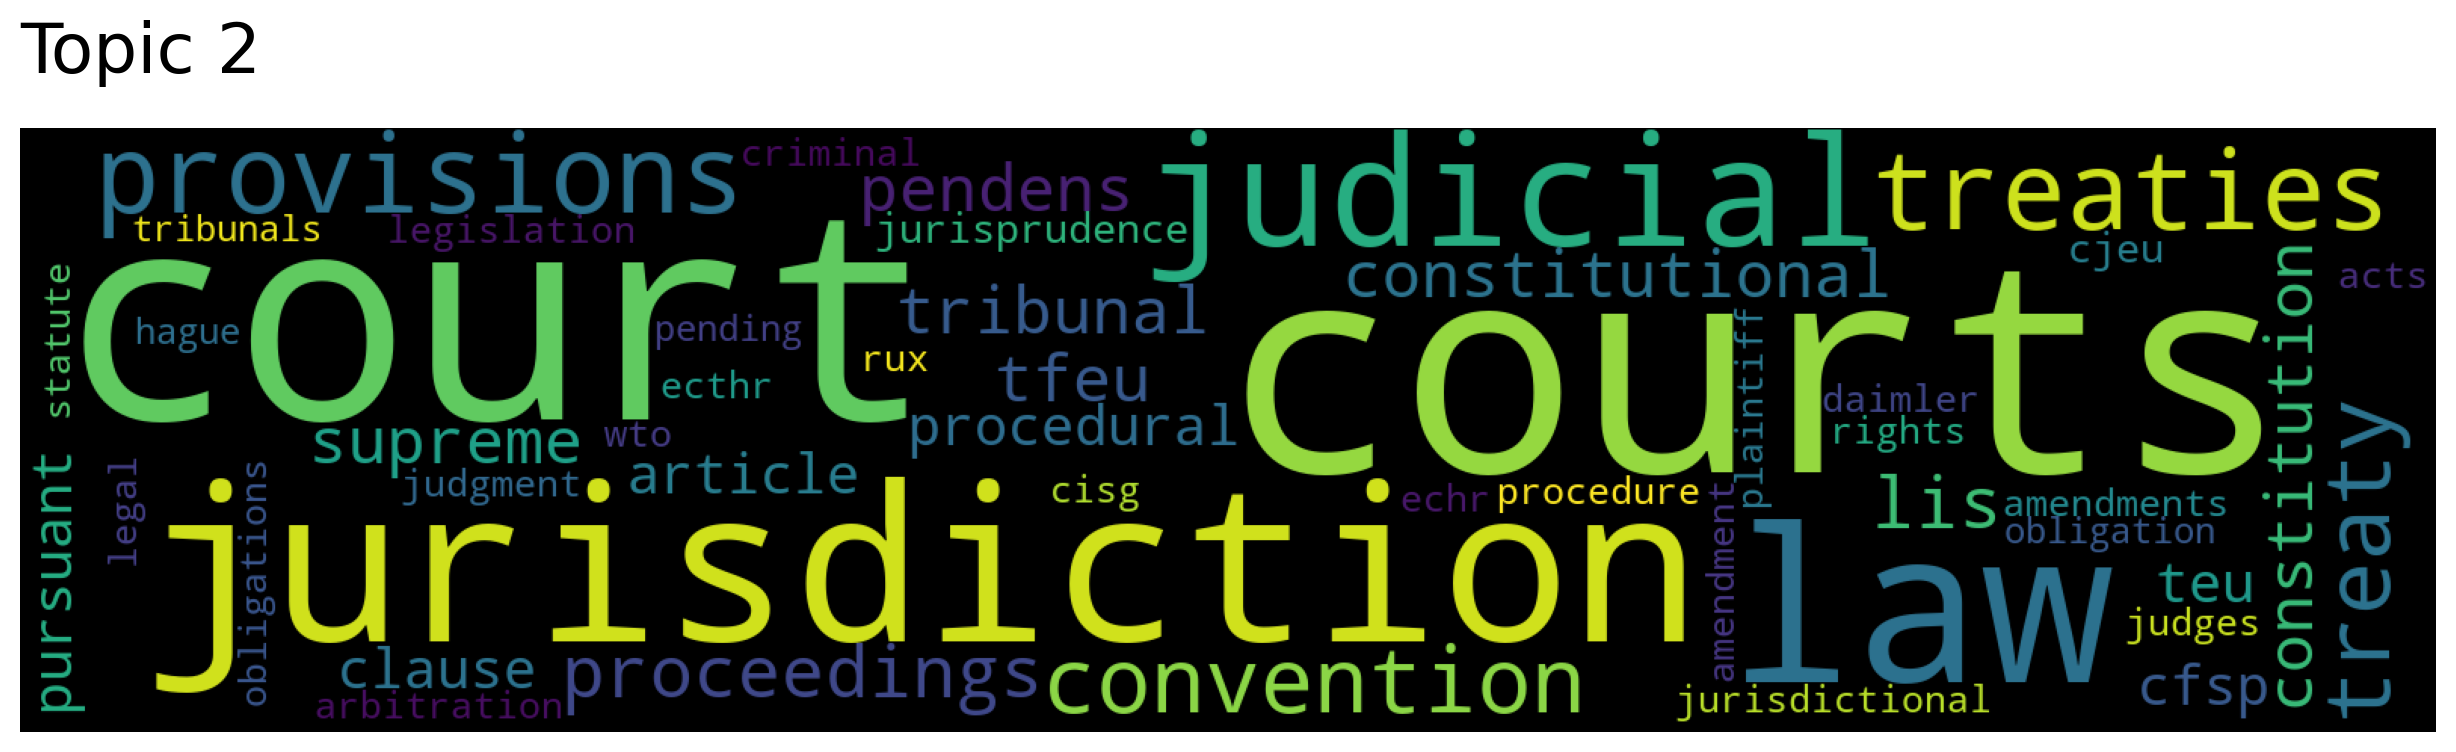

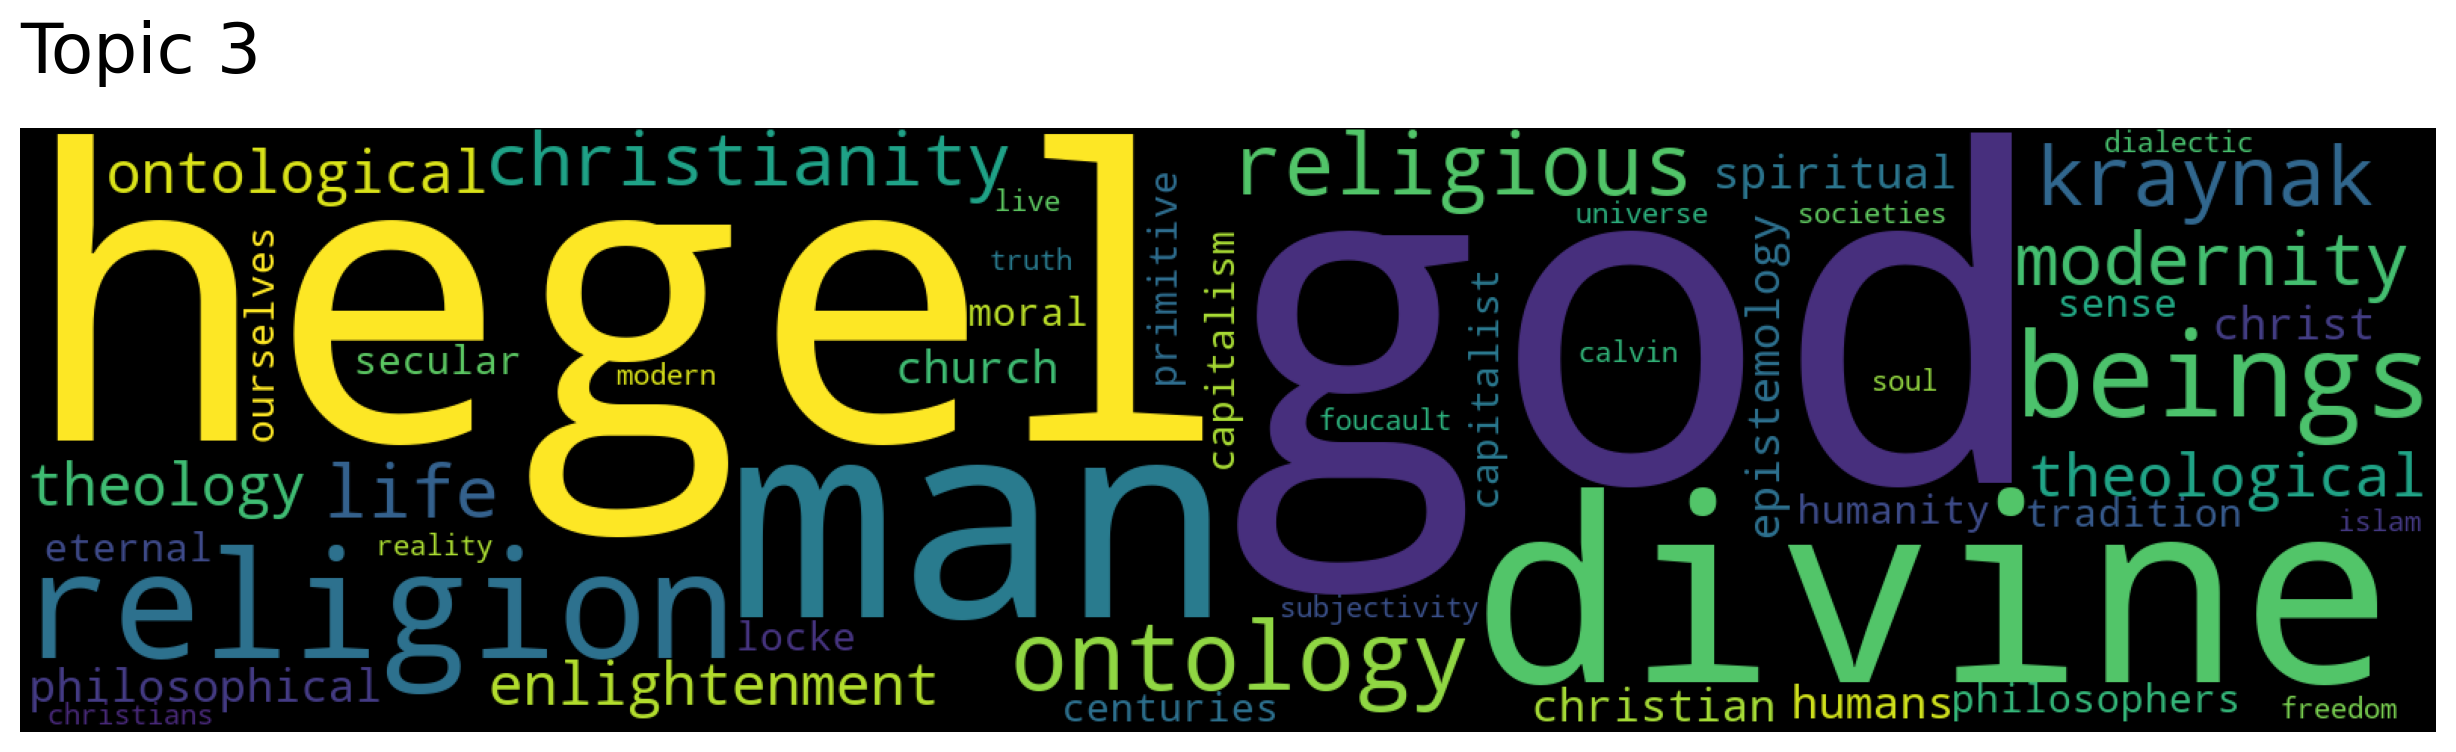

In [20]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["russia"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)